In [1]:
import os
import pandas as pd
import numpy as np
from scipy.optimize import fsolve
import math
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1.2)

In [2]:
#load of entropy files
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/CSV files")

entropy_cat = pd.read_csv("entropyBigram.csv")
entropy_ID = pd.read_csv("entropy_stopID.csv")

CrossEntropy_cat = pd.read_csv("CrossEntropyCat.csv")
CrossEntropy_ID = pd.read_csv("CrossEntropyID.csv")

In [3]:
#limit of predictability for stop cat
N = 172
pMaxCat = np.zeros(len(entropy_cat))
for i in range(0,len(entropy_cat)):
    S = entropy_cat['s_actual'].iloc[i]
    def f(p):
        return (-(p*math.log2(p)+(1-p)*math.log2(1-p)) + (1-p)*math.log2(N-1)) - S
    pMaxCat[i] = fsolve(f, 0.99)

In [4]:
pMaxCat

array([0.75047649, 0.82458972, 0.79206822, ..., 0.90687381, 0.87765425,
       0.89188309])

In [5]:
#limit of predictability for stop ID
N = 103972
pMaxID = np.zeros(len(entropy_ID))
for i in range(0,len(entropy_ID)):
    S = entropy_ID['s_actual'].iloc[i]
    def f(p):
        return (-(p*math.log2(p)+(1-p)*math.log2(1-p)) + (1-p)*math.log2(N-1)) - S
    pMaxID[i] = fsolve(f, 0.99)

In [6]:
colors = ["#C54E57", "#65ab7c"] #dull red, tea, cornflower blue
sns.set_palette(sns.color_palette(colors))

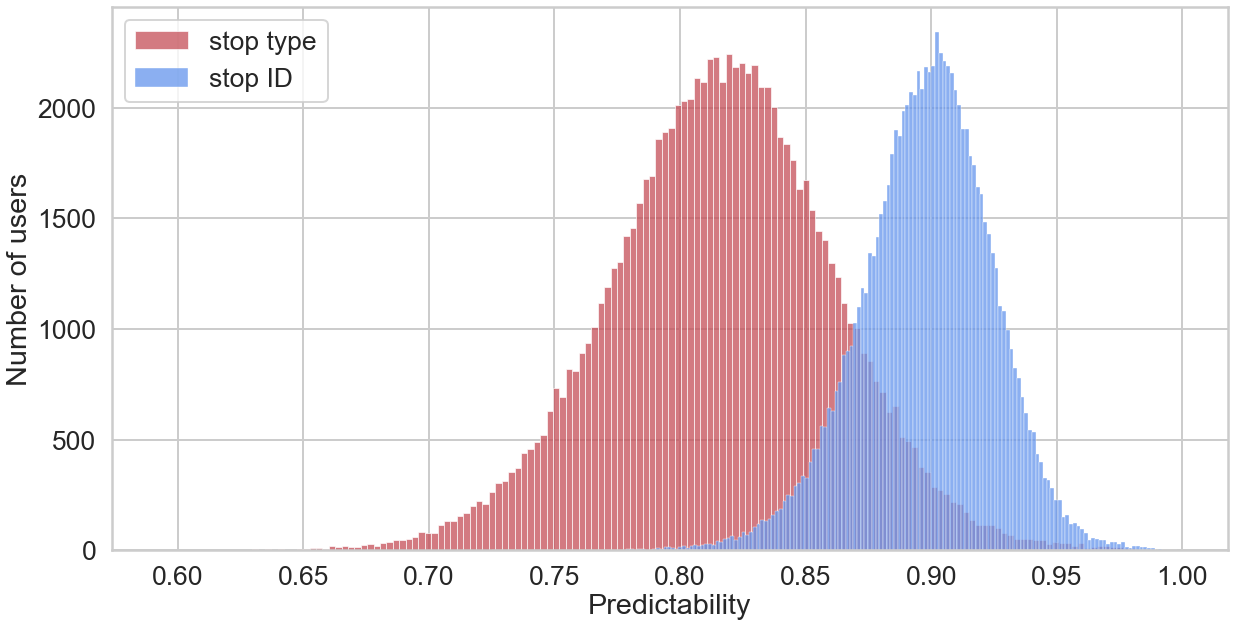

In [7]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/Plots")

sns.histplot(data=pMaxCat)
sns.histplot(data=pMaxID, color = 'cornflowerblue')
plt.legend(loc='upper left', labels=['stop type', 'stop ID'])
plt.xlabel('Predictability')
plt.ylabel('Number of users')
plt.savefig('Predictability.png', bbox_inches='tight')
plt.show()

In [8]:
#min p
print(min(pMaxCat))
print(min(pMaxID))

0.5939061097511361
0.7252641676452486


In [9]:
#max p
print(max(pMaxCat))
print(max(pMaxID))

0.9966064568779264
0.9978533122431991


In [10]:
#median
print(np.median(pMaxCat))
print(np.median(pMaxID))

0.8170407470157041
0.8992475669270614


In [11]:
#limit of cross-predictability for stop cat
N = 172
pCrossMaxCat = np.zeros(len(CrossEntropy_cat))
for i in range(0,len(CrossEntropy_cat)):
    S = CrossEntropy_cat['Cross-Entropy'].iloc[i]
    def f(p):
        return (-(p*math.log2(p)+(1-p)*math.log2(1-p)) + (1-p)*math.log2(N-1)) - S
    pCrossMaxCat[i] = fsolve(f, 0.99)

In [12]:
#limit of cross-predictability for stop ID
N = 103972
pCrossMaxID = np.zeros(len(CrossEntropy_ID))
for i in range(0,len(CrossEntropy_ID)):
    S = CrossEntropy_ID['Cross-Entropy'].iloc[i]
    def f(p):
        return (-(p*math.log2(p)+(1-p)*math.log2(1-p)) + (1-p)*math.log2(N-1)) - S
    pCrossMaxID[i] = fsolve(f, 0.99)

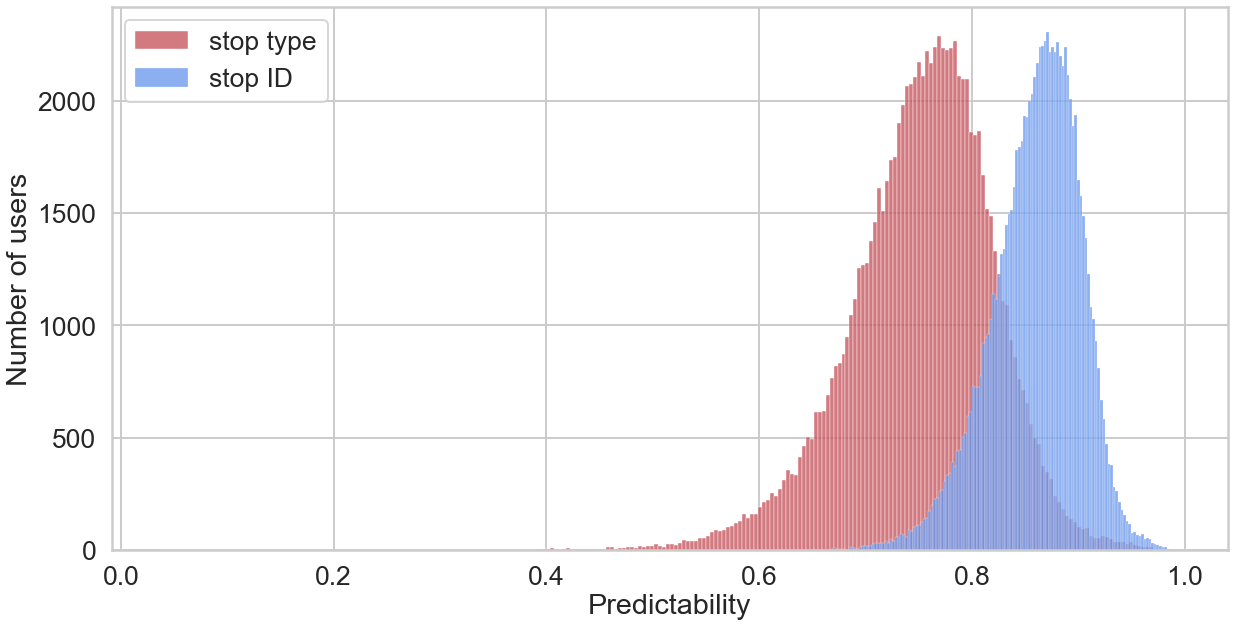

In [13]:
sns.histplot(data=pCrossMaxCat)
sns.histplot(data=pCrossMaxID, color = 'cornflowerblue')
plt.legend(loc='upper left', labels=['stop type', 'stop ID'])
plt.xlabel('Predictability')
plt.ylabel('Number of users')
plt.savefig('CrossPredictability.png', bbox_inches='tight')
plt.show()

In [14]:
#min p
print(min(pCrossMaxCat))
print(min(pCrossMaxID))

0.039119319986019946
0.6143834118524715


In [15]:
#max p
print(max(pCrossMaxCat))
print(max(pCrossMaxID))

0.9852842600481073
0.9927281689624972


In [16]:
#median
print(np.median(pCrossMaxCat))
print(np.median(pCrossMaxID))

0.7584326085982962
0.8645682236148423


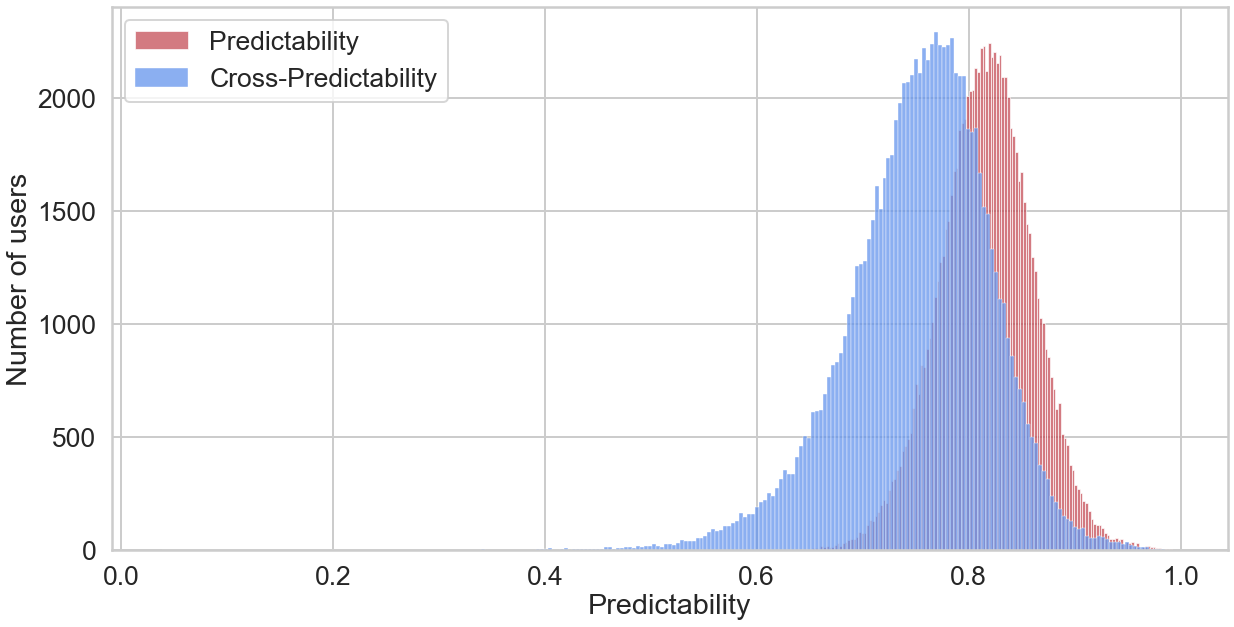

In [17]:
sns.histplot(data=pMaxCat)
sns.histplot(data=pCrossMaxCat, color = 'cornflowerblue')
plt.legend(loc='upper left', labels=['Predictability', 'Cross-Predictability'])
plt.xlabel('Predictability')
plt.ylabel('Number of users')
plt.savefig('StopCatPredCompare.png', bbox_inches='tight')
plt.show()

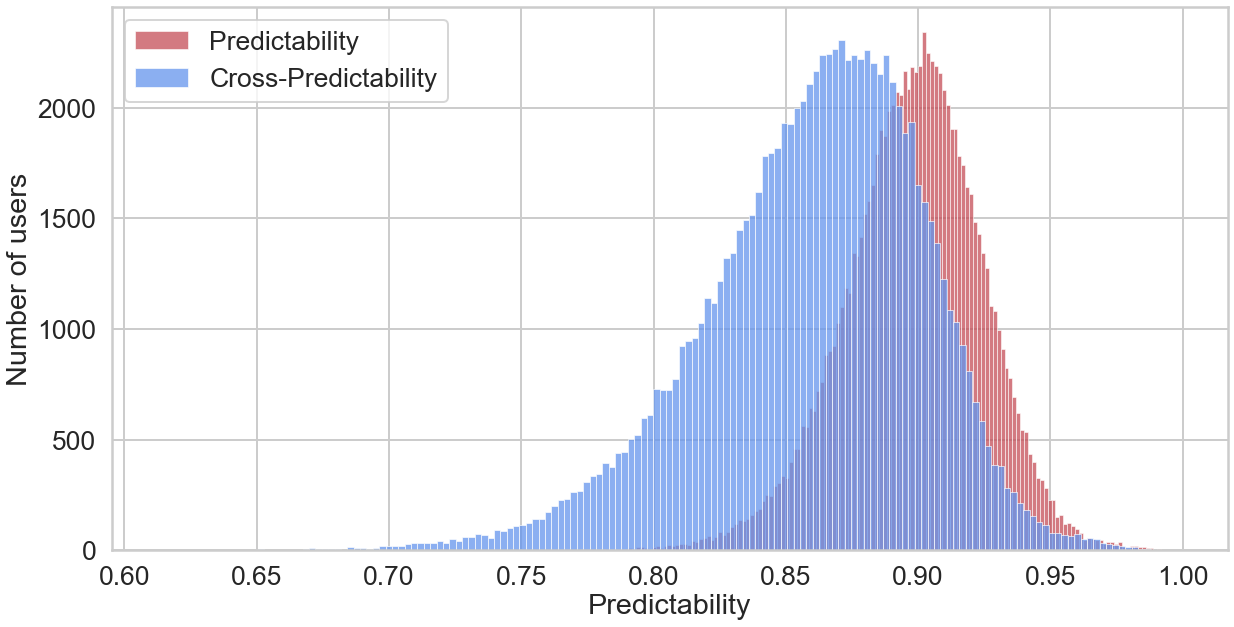

In [18]:
sns.histplot(data=pMaxID)
sns.histplot(data=pCrossMaxID, color = 'cornflowerblue')
plt.legend(loc='upper left', labels=['Predictability', 'Cross-Predictability'])
plt.xlabel('Predictability')
plt.ylabel('Number of users')
plt.savefig('PredIDCompare.png', bbox_inches='tight')
plt.show()